<a href="https://colab.research.google.com/github/CalvHobbes/fcc-ai/blob/main/makemore_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CalvHobbes/fcc-ai.git

fatal: destination path 'fcc-ai' already exists and is not an empty directory.


In [ ]:
%cd fcc-ai


/content/fcc-ai


In [ ]:
%load makemore_tut.ipynb

The text you're trying to load seems pretty big (688375 characters). Continue (y/[N]) ? n
Operation cancelled.


In [ ]:
%cd ..
words=open('fcc-ai/names.txt','r').read().splitlines()


/content


In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip(chs, chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [ ]:
import torch

In [ ]:
N= torch.zeros((27,27), dtype=torch.int32)


In [ ]:
chars = sorted(list(set(''.join(words))))

In [ ]:
stoi = {s:i+1 for i,s in enumerate(chars)}

In [ ]:
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] +=1

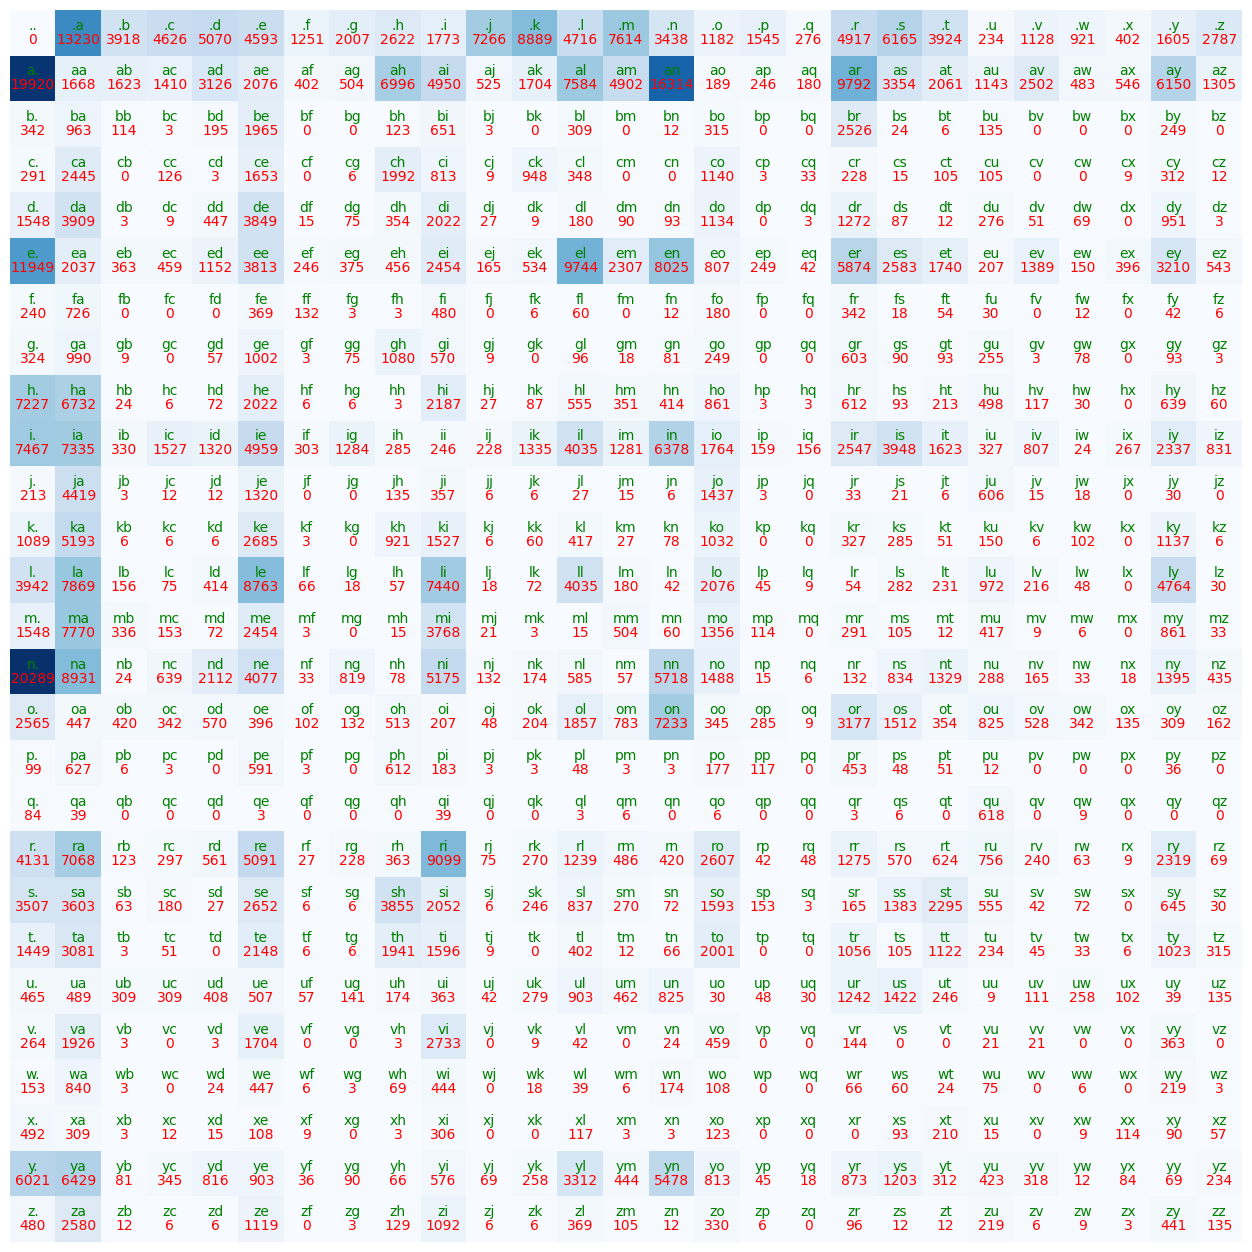

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='green')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='red')
plt.axis('off');


In [ ]:
p=N[0].float()
p /= p.sum()
p





tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, 1, replacement=True,generator=g).item()
itos[ix]

'j'

In [117]:
P = (N+1).float()

P /= P.sum(1, keepdim=True)




In [118]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  ix = 0
  out = []

  while True:
    p = P[ix]

    ix=torch.multinomial(p, 1, replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [119]:
log_likelihood = 0.0
n = 0
for w in ['andrejq']:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    probability = P[ix1,ix2]
    logprob = torch.log(probability).item()
    log_likelihood += logprob
    n += 1
    print(f'{ch1},{ch2}: {probability:.4f}:{logprob:.4f}')

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f'{nll=}')
averagenll =nll/n
print(f'{averagenll=}')

.,a: 0.1376:-1.9831
a,n: 0.1605:-1.8298
n,d: 0.0384:-3.2594
d,r: 0.0771:-2.5629
r,e: 0.1336:-2.0133
e,j: 0.0027:-5.9115
j,q: 0.0001:-9.0742
q,.: 0.1008:-2.2943
log_likelihood=-28.928351640701294
nll=28.928351640701294
averagenll=3.6160439550876617


In [123]:
# Create training set
xs,ys = [],[]
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(f'{xs=}, {ys=}')


xs=tensor([ 0,  5, 13, 13,  1]), ys=tensor([ 5, 13, 13,  1,  0])


In [126]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

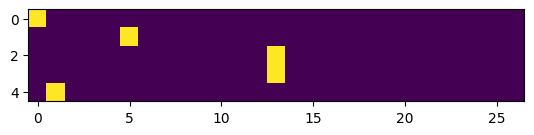

In [127]:
plt.imshow(xenc)

In [149]:
W = torch.randn((27,27))
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1, keepdims=True)
probs

tensor([[0.2061, 0.0174, 0.0321, 0.0444, 0.0072, 0.0747, 0.0268, 0.0636, 0.0209,
         0.0968, 0.0654, 0.0326, 0.0046, 0.0281, 0.0144, 0.0092, 0.0320, 0.0409,
         0.0041, 0.0129, 0.0146, 0.0169, 0.0831, 0.0198, 0.0040, 0.0074, 0.0204],
        [0.0408, 0.0303, 0.0991, 0.0077, 0.0950, 0.0195, 0.0201, 0.1388, 0.0163,
         0.0249, 0.0130, 0.0404, 0.0068, 0.0133, 0.0522, 0.0423, 0.0218, 0.0120,
         0.0084, 0.0053, 0.0060, 0.0108, 0.0244, 0.0681, 0.1647, 0.0045, 0.0134],
        [0.0295, 0.0266, 0.0336, 0.0083, 0.0807, 0.0090, 0.0120, 0.0513, 0.0178,
         0.1382, 0.0262, 0.0258, 0.0521, 0.0164, 0.0259, 0.0070, 0.0006, 0.0093,
         0.0271, 0.1095, 0.0147, 0.0321, 0.0368, 0.0039, 0.0034, 0.1010, 0.1010],
        [0.0295, 0.0266, 0.0336, 0.0083, 0.0807, 0.0090, 0.0120, 0.0513, 0.0178,
         0.1382, 0.0262, 0.0258, 0.0521, 0.0164, 0.0259, 0.0070, 0.0006, 0.0093,
         0.0271, 0.1095, 0.0147, 0.0321, 0.0368, 0.0039, 0.0034, 0.1010, 0.1010],
        [0.0237, 0.0741,

In [150]:
# SUMMARY
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [151]:
# FORWARD PASS
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'